# Navigating College Scorecard Data with Jupyter Notebooks

#### We will work through accessing and examining College Scorecard data via an API
#### This is not meant to be a rigorous dive into any of these tools
#### This is an introduction to what is possible through (slightly) advanced data analytics

In [ ]:
#To Start, run this cell to confirm you are successfully connected to a kernal
print('hello world')

## Stage 0: Intro to our tools
This section shares references to better understand the tools we will use. Please feel free to skip

### APIs

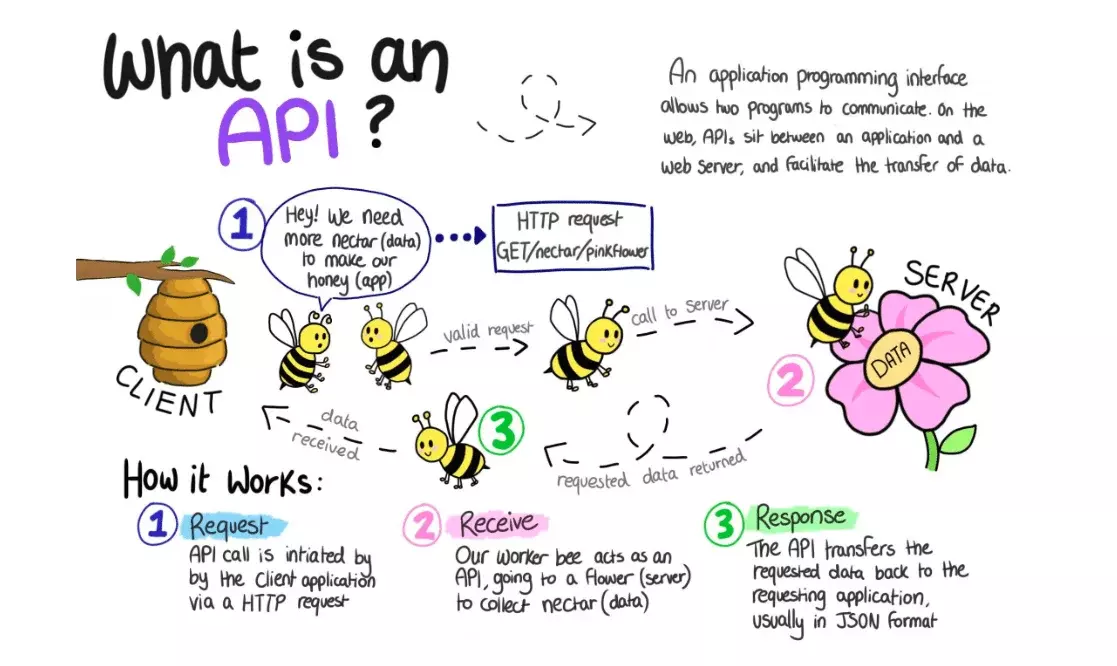
###### image source: https://rapidapi.com/blog/wp-content/uploads/2023/03/What-is-an-API-definition.webp

### College Scorecard

#### Compendium of Institute Level, time series data from the US Department of Education

#### Established to increase transparency and enable fair comparisons between colleges

#### If you already have a connection to the Scorecard data, you may skip the steps below. Just locate your API key, and have it ready for use later in this workbook

#### If you are unable to request an API key (which should not be the case), you will use a sample of data from a CSV

Reference to College Scorecard API: https://github.com/RTICWDT/open-data-maker/blob/master/API.md

### Step 1: Go to the Key Request page: https://collegescorecard.ed.gov/data/documentation/

### Step 2: Scroll down to this section:

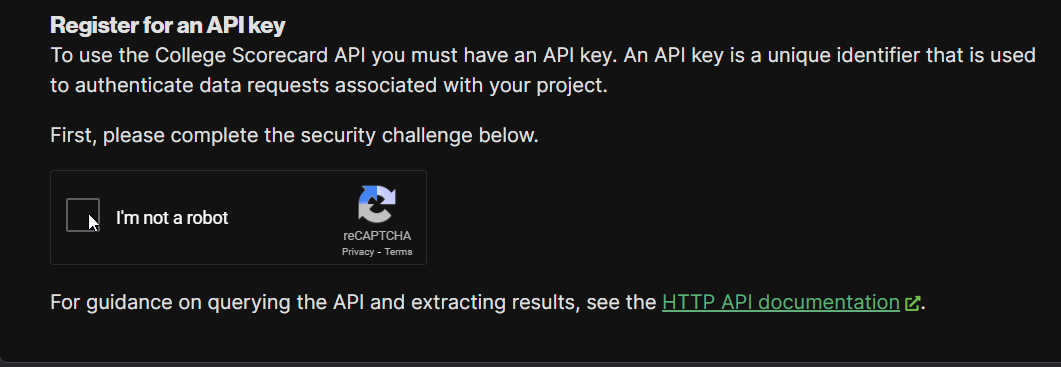

### Step 3: If you're not a robot / bot, please click and complete the Captcha

### Step 4: Complete the 3 required fields



### Python
#### Python is a high level programming language
#### Further details on Python are beyond the scope of this demo, 
#### However, to help (and show video capabilities of Jupyter) run the cell below by clicking the $\blacktriangleright$ button
###### Note, the $\blacktriangleright$ icon is a result of Latex. If you're familiar with Latex, its functionality can be used natively in Jupyter

In [ ]:
from IPython.display import Audio,Image, YouTubeVideo
id='kqtD5dpn9C8?si=kgYhoEKm5uqmsjwy'
YouTubeVideo(id=id,width=600,height=300)

## Stage 1: Loading Data

#### To further demo Jupyter Notebooks, we will walk through a quick analysis using scorecard data

#### Interactivity was built into the notebook. For a handy reference on building your own: https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Events.html

#### To continue our interactive journey, please run the code below! It looks like $\longrightarrow$ $\bullet$ $\bullet$ $\bullet$

In [ ]:
try:
    from ipywidgets import interact, interactive, fixed, interact_manual, Layout, Button, HBox, VBox
    import ipywidgets as widgets
except:
    import micropip
    await micropip.install('ipywidgets')
    from ipywidgets import interact, interactive, fixed, interact_manual, Layout, Button, HBox, VBox
    import ipywidgets as widgets
import requests
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
    
def user_input(response):
    return response

def test_key(key):
    key = key.strip()
    try:
        r = requests.get(f"https://api.data.gov/ed/collegescorecard/v1/schools.json?latest.school.name=Georgia%20Institute%20of%20Technology&fields=latest.school.name&api_key={key}")
        data = r.json()
        if data['results'][0]['latest.school.name'] == "Georgia Institute of Technology-Main Campus":
            print('your API key was successfully entered, please continue')
            return key
        else:
            print('There was an error with your API Key. Please try again or choose \'N\' for accessing via API')
            return 'N'
    except:
        print('There was an error with your API Key. Please try again or choose \'N\' for accessing via API')
        return 'N'

has_key = input("Would you like to access the API? Y/N: ")
if has_key.strip()[0].lower() == 'y':
    api_key = input("Please copy and paste your key here: ")
    api_key = test_key(api_key)
else:
    api_key = 'N'
    print('You will be using a pre-processed subsection of scorecard data')


### NOTE If you did not provide an API key, the next few sections do not influence your data and are merely for demonstration
#### Run the clode below

In [ ]:
GA = interactive(user_input, response = widgets.Checkbox(value=False,description='Georgia Schools',disabled=False,indent=False,));
TN = interactive(user_input, response = widgets.Checkbox(value=False,description='Tennessee Schools',disabled=False,indent=False,));
TX = interactive(user_input, response = widgets.Checkbox(value=False,description='Texas Schools',disabled=False,indent=False,));
NC = interactive(user_input, response = widgets.Checkbox(value=False,description='North Carolina Schools',disabled=False,indent=False,));
FL = interactive(user_input, response = widgets.Checkbox(value=False,description='Florida Schools',disabled=False,indent=False,));
AL = interactive(user_input, response = widgets.Checkbox(value=False,description='Alabama Schools',disabled=False,indent=False,));

print('You\'ll be given a list of schools (10 from each state) please choose the states you want to see schools for')
display(widgets.HBox((GA, TN, TX)))
display(widgets.HBox((NC, FL, AL)))

#### After selecting the states, run the cell below

In [ ]:
GA_schools = ['GA Augusta University','GA Clark Atlanta University','GA Columbus State University','GA Emory University','GA Georgia Institute of Technology','GA Georgia State University--Atlanta','GA Kennesaw State University','GA Mercer University','GA University of Georgia--Athens','GA Valdosta State University']
AL_schools = ['AL Auburn University--Auburn','AL Samford University','AL Troy University','AL Tuskegee University','AL The University of Alabama','AL Alabama State University','AL University of North Alabama','AL University of Mobile','AL University of South Alabama','AL University of West Alabama']
FL_schools = ['FL Barry University','FL Ave Maria University','FL Florida Southern College','FL Florida State University','FL Florida Institute of Technology--Melbourne','FL University of Florida--Gainesville','FL University of Central Florida','FL University of Miami--Coral Gables','FL The University of Tampa','FL University of South Florida']
NC_schools = ['NC Appalachian State University','NC Campbell University','NC Duke University','NC East Carolina University','NC Elon University','NC North Carolina State University--Raleigh','NC University of North Carolina at Chapel Hill','NC University of North Carolina at Charlotte','NC Wake Forest University','NC Winston-Salem State University']
TN_schools = ['TN Vanderbilt University','TN University of Tennessee--Knoxville','TN The University of the South','TN University of Memphis','TN Tennessee Technological University','TN Carson-Newman University','TN Middle Tennessee State University','TN Lipscomb University','TN Belmont University','TN East Tennessee State University']
TX_schools = ['TX Rice University','TX Baylor University--Waco','TX Texas A&M University--College Station','TX Texas Christian University','TX Texas Wesleyan University','TX University of Houston-Clear Lake','TX The University of Texas at Austin','TX Tarleton State University','TX Trinity University--San Antonio','TX Lamar University']
GA_select = interactive(user_input, response = widgets.SelectMultiple(options = GA_schools, value = GA_schools, description = 'GA Schools', rows = 11))
AL_select = interactive(user_input, response = widgets.SelectMultiple(options = AL_schools, value = AL_schools, description = 'AL Schools', rows = 11))
FL_select = interactive(user_input, response = widgets.SelectMultiple(options = FL_schools, value = FL_schools, description = 'FL Schools', rows = 11))
NC_select = interactive(user_input, response = widgets.SelectMultiple(options = NC_schools, value = NC_schools, description = 'NC Schools', rows = 11))
TN_select = interactive(user_input, response = widgets.SelectMultiple(options = TN_schools, value = TN_schools, description = 'TN Schools', rows = 11))
TX_select = interactive(user_input, response = widgets.SelectMultiple(options = TX_schools, value = TX_schools, description = 'TX Schools', rows = 11))
states = [GA_select, TN_select, TX_select, NC_select, FL_select, AL_select]
tf_mask = [GA.result, TN.result, TX.result, NC.result, FL.result, AL.result]
to_display = [states[i] for i in range(len(states)) if tf_mask[i] == True]

if len(to_display) < 5:
    display(widgets.HBox(tuple(to_display)))
else:
    left_box = HBox(to_display[3:])
    right_box = HBox(to_display[:3])
    display(VBox([left_box, right_box]))

#### By running the cell below, you have a chance to add your school (or another school of interest)
#### You'll be asked for the School state 2 digit code (example: IL), school name (example: University of Illinois Urbana-Champaign), school city (example: Champaign)
#### This information can be found here: https://collegescorecard.ed.gov/

In [ ]:
specific_school = input("Did you not see your school and want to attempt to add it? Y/N: ")
if specific_school.strip()[0].lower() == 'y':
    school_detail = input("Please enter the information for the target college (example: GA, Georgia Institute of Technology, Atlanta): ")
    state, school, city = school_detail.split(',')
    encode = f'{state.strip()} {school.strip()}--{city.strip()}'
    print('Your target school has been added to the data collection')
else:
    encode = 'N'
    print('Please continue')

## Running the code below will create your data set! Please try to only run the cell below once to avoid overloading the API

In [ ]:
temp_list = [i.result for i in states if type(i.result)!= None]
school_list = set()
for i in range(len(temp_list)):
    if temp_list[i] != None:
        for j in temp_list[i]:
            school_list.add(j)
    else:
        continue
if encode != 'N' and encode not in school_list:
    school_list.add(encode)  

def string_convert(college):
    college = college.replace('&', ' ')
    state = college[:2]
    name = college[3:].replace(' ', '%20')
    try:
        clean_name, city = name.split('--')   
        return f"latest.school.name={clean_name.replace('--','')}&latest.school.state={state}&latest.school.city={city}&latest.school.operating=1&latest.school.main_campus=1"
    except:
        return f"latest.school.name={name}&latest.school.state={state}&latest.school.operating=1&latest.school.main_campus=1"

def locale(code):
    locale_dict = {11: 'City-Large', 12: 'City-Midsize', 13: 'City-Small', 21: 'Suburb-Large', 22:	'Suburb-Midsize', 23:	'Suburb-Small', 31: 'Town-Fringe', 32: 'Town-Distant', 33: 'Town-Remote', 41: 'Rural-Fringe', 42: 'Rural-Distant', 43: 'Rural-Remote'}
    return locale_dict[code]

def ownership(code):
    ownership_dict = {1: 'Public', 2: 'Private', 3: 'For profit'}
    return ownership_dict[code]

def get_data(school, api_key):
    r = requests.get(f"https://api.data.gov/ed/collegescorecard/v1/schools.json?{string_convert(school)}&fields=latest.school.name,latest.student.demographics.first_generation,latest.student.demographics.median_hh_income,latest.student.retention_rate.overall.full_time,latest.earnings.1_yr_after_completion.median,latest.completion.consumer_rate,latest.cost.avg_net_price.overall,latest.student.size,latest.admissions.admission_rate.overall,latest.student.demographics.race_ethnicity.black,latest.student.demographics.student_faculty_ratio,latest.aid.median_debt_suppressed.completers.overall,latest.school.ownership,latest.school.locale&api_key={api_key}")
    data = r.json()
    parse = data['results'][0]
    college_data = {}
    college_data['College Name'] = parse['latest.school.name']
    college_data['PCT First Gen'] = parse['latest.student.demographics.first_generation']
    college_data['Median hh Income'] = parse['latest.student.demographics.median_hh_income']
    college_data['Retention Rate'] = parse['latest.student.retention_rate.overall.full_time']
    college_data['Median Salary 1yr'] = parse['latest.earnings.1_yr_after_completion.median']
    college_data['Completion Rate'] = parse['latest.completion.consumer_rate']
    college_data['Net Price'] = parse['latest.cost.avg_net_price.overall']
    college_data['Student Size'] = parse['latest.student.size']
    college_data['Admission Rate'] = parse['latest.admissions.admission_rate.overall']
    college_data['PCT Black Students'] = parse['latest.student.demographics.race_ethnicity.black']
    college_data['Student Faculty Ratio'] = parse['latest.student.demographics.student_faculty_ratio']
    college_data['Median Graduation Debt'] = parse['latest.aid.median_debt_suppressed.completers.overall']
    college_data['Control'] = ownership(parse['latest.school.ownership'])
    college_data['Locale'] = locale(parse['latest.school.locale'])
    df = pd.DataFrame([college_data])
    return df

if api_key != 'N':
    dataframe_list = []
    school_list = list(school_list)
    for i in range(len(school_list)):
        data = get_data(school_list[i], api_key)
        dataframe_list.append(data)
    df = pd.concat(dataframe_list, ignore_index = True, sort = False)
    print('Your data has successfully compiled!')
else:
    try:
        df = pd.read_csv('SAIR_Colleges.csv')
    except:
        df = pd.read_csv('https://raw.githubusercontent.com/dlyczak3/SAIR_2023/main/SAIR_Colleges.csv?token=GHSAT0AAAAAACIU36VSFIIXLP6YOPGRCVBKZJD7Y5Q')
    finally:
        print('Your data has is ready to be used!')

print('Here is a sample of your data:')
df.head()

## Stage 2: Examples of Interactive Data Exploration

### The next section shows some tools / ideas for interactive exploration

#### To start, run the cell below to be able to select a sorting method for your data

In [ ]:
sort_by = interactive(user_input, response = widgets.ToggleButtons(options = [i for i in df.columns if df[i].dtype != 'object'],description = 'Sort By:',disabled = False,button_style = ''));
asce = interactive(user_input, response = widgets.Checkbox(value=False,description='Check for Ascending',disabled=False,indent=False,));

display(widgets.HBox((asce, sort_by)))

### Run the cell below to view your data

In [ ]:
sorted_df = df.sort_values(by = sort_by.result, ascending = asce.result)
sorted_df = sorted_df[["College Name", sort_by.result]]
sorted_df.head(10)

### Run the cell below to generate slides for selecting ranges of values

In [ ]:
column1 = 'Student Size'
column2 = 'Admission Rate'
column3 = 'Median Salary 1yr'
column4 = 'Completion Rate'

population = interactive(user_input, response = widgets.IntRangeSlider(min=min(df[column1])-100,max=max(df[column1])+100,step=1,description='Student Size:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='d',layout=Layout(width='400px')));
admit_rate = interactive(user_input, response = widgets.FloatRangeSlider(min=max(min(df[column2])-0.01,0),max=min(max(df[column2])+0.01,1.0),step=0.001,description='Admit Rate:',disabled=False,continuous_update=False,orientation='horizontal',readout=True, readout_format='.3f',layout=Layout(width='400px')));
grad_salary = interactive(user_input, response = widgets.IntRangeSlider(min=min(df[column3])-1000,max=max(df[column3])+1000,step=1,description='Grad Salary:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='d',layout=Layout(width='400px')));
completion = interactive(user_input, response = widgets.FloatRangeSlider(min=max(min(df[column4])-0.05,0),max=min(max(df[column4])+0.05,1.0),step=0.001,description='Completion Rate:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.3f',layout=Layout(width='400px'),style={'description_width': 'initial'}));

left_box = VBox([population, admit_rate])
right_box = VBox([grad_salary, completion])
HBox([left_box, right_box])

### After selecting the value ranges above, run the cell below to see a list of schools that match your search criteria

In [ ]:
filtered_df = df[(df[column1].between(population.result[0], population.result[1]) & df[column2].between(admit_rate.result[0], admit_rate.result[1]) & df[column3].between(grad_salary.result[0], grad_salary.result[1]) & df[column4].between(completion.result[0], completion.result[1]))]

display(filtered_df)

### Lastly, let's visualize our data!

### We will be making a parallel coordinates graph. For more information on them: https://www.data-to-viz.com/graph/parallel.html

#### To generate your graph, run the cell below and select the layers you want to visualize

In [ ]:
df['idx'] = df.index
num_cats = [i for i in df.columns if df[i].dtype != 'object'][:-1]
variable_one = interactive(user_input, response = widgets.RadioButtons(options=num_cats, layout = {'width': 'max-content'}, value = 'Admission Rate', description = 'Layer One:', disabled=False));
variable_two = interactive(user_input, response = widgets.RadioButtons(options=num_cats, layout = {'width': 'max-content'}, value = 'Student Size', description = 'Layer Two:', disabled=False));
variable_three = interactive(user_input, response = widgets.RadioButtons(options=num_cats, layout = {'width': 'max-content'}, value = 'Completion Rate', description = 'Layer Three:', disabled=False));
variable_four = interactive(user_input, response = widgets.RadioButtons(options=num_cats, layout = {'width': 'max-content'}, value = 'Median Salary 1yr', description = 'Layer Four:', disabled=False));

display(widgets.HBox((variable_one, variable_two,variable_three,variable_four )))

### Run the cell below to generate your graph!

In [ ]:
n_colors = len(df.columns)
colors = px.colors.sample_colorscale("IceFire", [n/(n_colors - 1) for n in range(n_colors)])

import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 200

fig = go.Figure(data=
    go.Parcoords(
        #dict(color = df['dummy'],
         #   colorscale = [[0,'rgba(200,0,0,0.1)'],[0.5,'rgba(0,200,0,0.1)'],[1,'rgba(0,0,200,0.1)']]),
        #dict(color = df['College Name'],
         #   colorscale = [[0,'rgba(200,0,0,0.1)'],[0.5,'rgba(0,200,0,0.1)'],[1,'rgba(0,0,200,0.1)']]),
        line = dict(color = df['idx'],
                   colorscale = colors,
                   showscale = False),
        dimensions = list([
            dict(range=[0,max(df['idx'])],
                       tickvals = df['idx'], ticktext = df['College Name'],
                       label ='College Name', values = df['idx']),
            dict(range = [min(df[variable_one.result]),max(df[variable_one.result])],
                 label = variable_one.result, values = df[variable_one.result]),
            dict(range = [min(df[variable_two.result]),max(df[variable_two.result])],
                 label = variable_two.result, values = df[variable_two.result]),
            dict(range = [min(df[variable_three.result]),max(df[variable_three.result])],
                 label = variable_three.result, values = df[variable_three.result]),
            dict(range = [min(df[variable_four.result]),max(df[variable_four.result])],
                 label = variable_four.result, values = df[variable_four.result])])))
fig.update_layout(width = 1500, height = 500, plot_bgcolor ='#54585A', autosize = False, margin=dict(l=300,t=60,b=50), font_size = 18, font_color = '#54585A')
fig.show()

## Stage 3: Free Range

In [ ]:
###Select majors by college (for implementing multiple colleges
##Simple attempt
colls = ['College of Engineering', 'Ivan Allen College', 'College of Sciences', 'Scheller College of Business', 'College of Design', 'College of Computing']

tab_contents = colls
children = [widgets.Text(description=name) for name in tab_contents]
tab = widgets.Tab()
tab.children = children
tab.titles = [str(i) for i in range(len(children))]
tab

##Advanced attempt
children = [widgets.SelectMultiple(
    options = colls,
    value= colls,
    #rows=10,
    description='Degrees',
    disabled=False
) for name in colls]
tab = widgets.Tab()
tab.children = children
tab.titles = [str(i) for i in range(len(children))]
tab

In [ ]:
print(df.columns)

For a Jupyter counterfactual: https://betterprogramming.pub/pros-and-cons-for-jupyter-notebooks-as-your-editor-for-data-science-work-tip-pycharm-is-probably-40e88f7827cb